In [1]:
%matplotlib inline

import glob
from platform import python_version

import matplotlib
import numpy as np
import pandas as pd
import sklearn
import torch

In [2]:
print("python version==%s" % python_version())
print("pandas==%s" % pd.__version__)
print("numpy==%s" % np.__version__)
print("sklearn==%s" % sklearn.__version__)
print("torch==%s" % torch.__version__)
print("matplotlib==%s" % matplotlib.__version__)

python version==3.7.6
pandas==0.25.3
numpy==1.15.4
sklearn==0.20.1
torch==1.3.1
matplotlib==3.1.1


In [3]:
import matplotlib.pyplot as plt

plt.rcParams[
    "figure.facecolor"
] = "w"  # force white background on plots when using dark mode in JupyterLab

In [4]:
files = sorted(glob.glob('covid19_spain_counties/*.csv'))
files

['covid19_spain_counties\\Andalucía.csv',
 'covid19_spain_counties\\Aragón.csv',
 'covid19_spain_counties\\Asturias.csv',
 'covid19_spain_counties\\Baleares.csv',
 'covid19_spain_counties\\C. Valenciana.csv',
 'covid19_spain_counties\\Canarias.csv',
 'covid19_spain_counties\\Cantabria.csv',
 'covid19_spain_counties\\Castilla La Mancha.csv',
 'covid19_spain_counties\\Castilla y León.csv',
 'covid19_spain_counties\\Cataluña.csv',
 'covid19_spain_counties\\Ceuta.csv',
 'covid19_spain_counties\\Extremadura.csv',
 'covid19_spain_counties\\Galicia.csv',
 'covid19_spain_counties\\La Rioja.csv',
 'covid19_spain_counties\\Madrid.csv',
 'covid19_spain_counties\\Melilla.csv',
 'covid19_spain_counties\\Murcia.csv',
 'covid19_spain_counties\\Navarra.csv',
 'covid19_spain_counties\\País Vasco.csv']

In [5]:
df = pd.concat(map(pd.read_csv, files))
#df_Arlington = pd.read_csv('covid_19_daily_reports_counties\Andalucía.csv')
df[df['CCAA'] == 'Andalucía'].shape
df.shape

(1653, 8)

In [6]:
df[df['CCAA'] == 'Andalucía'].head(-10)

,Unnamed: 0,date,code_number,CCAA,number_of_cases,hospitalized,ICU,recovered
0,0,2/21/2020,1,Andalucía,0,NaN,NaN,NaN
1,1,2/22/2020,1,Andalucía,0,NaN,NaN,NaN
2,2,2/23/2020,1,Andalucía,0,NaN,NaN,NaN
3,3,2/24/2020,1,Andalucía,0,NaN,NaN,NaN
4,4,2/25/2020,1,Andalucía,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
72,72,5/3/2020,1,Andalucía,14251,5961.0,736.0,6897.0
73,73,5/4/2020,1,Andalucía,14311,5973.0,738.0,7021.0
74,74,5/5/2020,1,Andalucía,14351,5983.0,738.0,7230.0
75,75,5/6/2020,1,Andalucía,14593,6012.0,740.0,7679.0


In [7]:
df[df['CCAA'] == 'Andalucía'].shape

(87, 8)

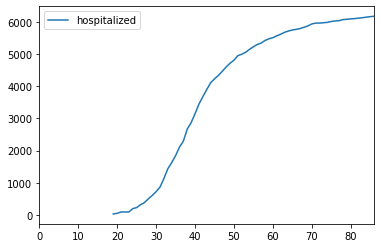

In [8]:
ax = df[df['CCAA'] == 'Andalucía'].plot( y = 'hospitalized')

In [9]:
df = df.reset_index()


In [10]:
df.head(100)

,index,Unnamed: 0,date,code_number,CCAA,number_of_cases,hospitalized,ICU,recovered
0,0,0,2/21/2020,1,Andalucía,0,NaN,NaN,NaN
1,1,1,2/22/2020,1,Andalucía,0,NaN,NaN,NaN
2,2,2,2/23/2020,1,Andalucía,0,NaN,NaN,NaN
3,3,3,2/24/2020,1,Andalucía,0,NaN,NaN,NaN
4,4,4,2/25/2020,1,Andalucía,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
95,8,95,2/29/2020,2,Aragón,0,NaN,NaN,NaN
96,9,96,3/1/2020,2,Aragón,0,NaN,NaN,NaN
97,10,97,3/2/2020,2,Aragón,0,NaN,NaN,NaN
98,11,98,3/3/2020,2,Aragón,0,NaN,NaN,NaN


In [11]:
train_df = df.truncate(before = 0 , after = 1305)

In [12]:
train_df.shape

(1306, 9)

In [13]:
train_df.head(-1)

,index,Unnamed: 0,date,code_number,CCAA,number_of_cases,hospitalized,ICU,recovered
0,0,0,2/21/2020,1,Andalucía,0,NaN,NaN,NaN
1,1,1,2/22/2020,1,Andalucía,0,NaN,NaN,NaN
2,2,2,2/23/2020,1,Andalucía,0,NaN,NaN,NaN
3,3,3,2/24/2020,1,Andalucía,0,NaN,NaN,NaN
4,4,4,2/25/2020,1,Andalucía,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1300,82,1213,5/13/2020,13,Madrid,70796,41856.0,3555.0,39984.0
1301,83,1214,5/14/2020,13,Madrid,71040,41962.0,3564.0,40199.0
1302,84,1215,5/15/2020,13,Madrid,71334,42057.0,3574.0,40383.0
1303,85,1216,5/16/2020,13,Madrid,71625,42157.0,3577.0,40586.0


In [14]:
val_df = df.truncate(before = 1305 , after = 1478)

In [15]:
val_df.shape

(174, 9)

In [16]:
val_df.head(-1)

,index,Unnamed: 0,date,code_number,CCAA,number_of_cases,hospitalized,ICU,recovered
1305,0,1218,2/21/2020,19,Melilla,0,NaN,NaN,NaN
1306,1,1219,2/22/2020,19,Melilla,0,NaN,NaN,NaN
1307,2,1220,2/23/2020,19,Melilla,0,NaN,NaN,NaN
1308,3,1221,2/24/2020,19,Melilla,0,NaN,NaN,NaN
1309,4,1222,2/25/2020,19,Melilla,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1473,81,1386,5/12/2020,14,Murcia,2333,665.0,112.0,1819.0
1474,82,1387,5/13/2020,14,Murcia,2398,666.0,112.0,1861.0
1475,83,1388,5/14/2020,14,Murcia,2437,672.0,112.0,1998.0
1476,84,1389,5/15/2020,14,Murcia,2477,675.0,112.0,2034.0


In [17]:
test_df = df.truncate(before = 1479 , after = 1652)

In [18]:
test_df.shape

(174, 9)

In [19]:
test_df.head(-1)

,index,Unnamed: 0,date,code_number,CCAA,number_of_cases,hospitalized,ICU,recovered
1479,0,1392,2/21/2020,15,Navarra,0,NaN,NaN,NaN
1480,1,1393,2/22/2020,15,Navarra,0,NaN,NaN,NaN
1481,2,1394,2/23/2020,15,Navarra,0,NaN,NaN,NaN
1482,3,1395,2/24/2020,15,Navarra,0,NaN,NaN,NaN
1483,4,1396,2/25/2020,15,Navarra,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1647,81,1560,5/12/2020,16,País Vasco,17840,6929.0,574.0,14913.0
1648,82,1561,5/13/2020,16,País Vasco,18095,6955.0,575.0,14986.0
1649,83,1562,5/14/2020,16,País Vasco,18100,6994.0,577.0,15256.0
1650,84,1563,5/15/2020,16,País Vasco,18138,7009.0,578.0,15256.0


### Data Scaling 

To help the LSTM model to converge faster it is important to scale the data.
It is possible that large values in the inputs slows down the learning. 
We are going to use StandardScaler from sklearn library to scale the data. 
The scaler is fit on the training set and it is used to transform the unseen trade data on validation and test set. 
If we would fit the scalar on all data, the model would overfit and it would achieve good results on this data, but performance would suffer on the real world data.

In [79]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train_df[['number_of_cases', 'hospitalized' , 'ICU', 'recovered']] = scaler.fit_transform(train_df[['number_of_cases','hospitalized' , 'ICU', 'recovered']])
val_df[['number_of_cases','hospitalized' , 'ICU', 'recovered']] = scaler.transform(val_df[['number_of_cases','hospitalized' , 'ICU', 'recovered']])
test_df[['number_of_cases','hospitalized' , 'ICU', 'recovered']] = scaler.transform(test_df[['number_of_cases','hospitalized' , 'ICU', 'recovered']])

C:\Users\Mukhtar\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\Mukhtar\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
C:\Users\Mukhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  """
C:\Users\Mukhtar\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  


In [21]:
# train_df[train_df['Confirmed'].apply(lambda x: isinstance(x, str))]

In [22]:
train_df.head(20)

,index,Unnamed: 0,date,code_number,CCAA,number_of_cases,hospitalized,ICU,recovered
0,0,0,2/21/2020,1,Andalucía,0,NaN,NaN,NaN
1,1,1,2/22/2020,1,Andalucía,0,NaN,NaN,NaN
2,2,2,2/23/2020,1,Andalucía,0,NaN,NaN,NaN
3,3,3,2/24/2020,1,Andalucía,0,NaN,NaN,NaN
4,4,4,2/25/2020,1,Andalucía,0,NaN,NaN,NaN
5,5,5,2/26/2020,1,Andalucía,0,NaN,NaN,NaN
6,6,6,2/27/2020,1,Andalucía,1,NaN,NaN,NaN
7,7,7,2/28/2020,1,Andalucía,6,NaN,NaN,NaN
8,8,8,2/29/2020,1,Andalucía,8,NaN,NaN,NaN
9,9,9,3/1/2020,1,Andalucía,12,NaN,NaN,NaN


### Data Transformation

In [23]:
train_counties = train_df.CCAA.unique()
val_counties = val_df.CCAA.unique()
test_counties = test_df.CCAA.unique()
print(train_counties)

['Andalucía' 'Aragón' 'Asturias' 'Baleares' 'C. Valenciana' 'Canarias'
 'Cantabria' 'Castilla La Mancha' 'Castilla y León' 'Cataluña' 'Ceuta'
 'Extremadura' 'Galicia' 'La Rioja' 'Madrid' 'Melilla']


In [69]:
def transform_data2(arr, seq_len , x , y):
    for i in range(len(arr) - seq_len):
        x_i = arr[i : i + seq_len]
        y_i = arr[i + 1 : i + seq_len + 1 , 1]
        x.append(x_i)
        y.append(y_i)

In [76]:
def transform_data3(x , y):
        
        from torch.autograd import Variable
        #print(np.shape(y))
        x_arr = np.array(x).reshape(-1, seq_len)
        y_arr = np.array(y).reshape(-1, seq_len)
        x_var = Variable(torch.from_numpy(x_arr).float())
        y_var = Variable(torch.from_numpy(y_arr).float())
        print("finished")
        return x_var, y_var

In [77]:
def transform_data(dataframe , the_counties, seq_len):
    
    x, y = [], []
    for county in the_counties:
        arr = dataframe[dataframe['CCAA'] == county].loc[:,['number_of_cases', 'hospitalized']].to_numpy()
        #print(np.shape(arr))
        transform_data2(arr, seq_len , x , y)
    x_var, y_var = transform_data3(x , y)
    return x_var, y_var

In [78]:
from torch.autograd import Variable

seq_len = 20

x_train, y_train = transform_data(train_df, train_counties, seq_len)
x_val, y_val = transform_data(val_df, val_counties, seq_len)
x_test, y_test = transform_data(test_df, test_counties, seq_len)

(1005, 20)
finished
(134, 20)
finished
(134, 20)
finished


In [68]:
print(y_train.shape)

torch.Size([1005, 20])


In [28]:
def plot_sequence(axes, i, x_train, y_train):
    axes[i].set_title("%d. Sequence" % (i + 1))
    axes[i].set_xlabel("Time bars")
    axes[i].set_ylabel("Scaled VWAP")
    axes[i].plot(range(seq_len), x_train[i].cpu().numpy(), color="r", label="Feature")
    axes[i].plot(range(1, seq_len + 1), y_train[i].cpu().numpy(), color="b", label="Target")
    axes[i].legend()

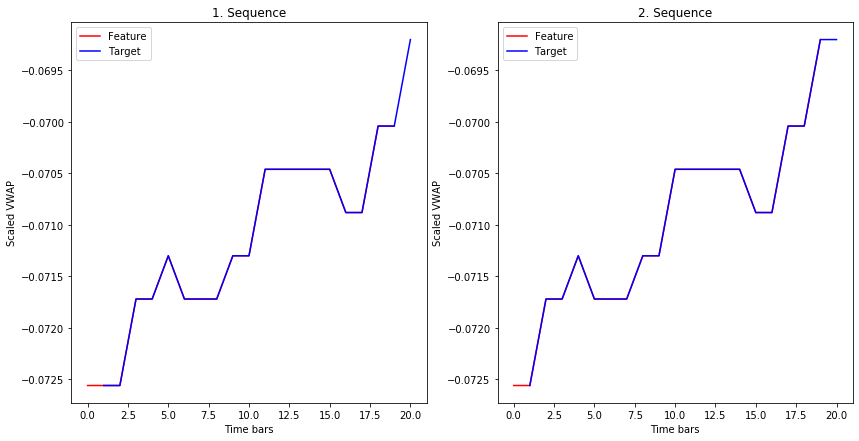

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
plot_sequence(axes, 0, x_train, y_train)
plot_sequence(axes, 1, x_train, y_train)

## Long Short Term Memory Neural Network

The Long Short Term Memory neural network is a type of a Recurrent Neural Network (RNN). 
RNNs use previous time events to inform the later ones.
For example, to classify what kind of event is happening in a movie, the model needs to use information about previous events.
RNNs work well if the problem requires only recent information to perform the present task. 
If the problem requires long term dependencies, RNN would struggle to model it.
The LSTM was designed to learn long term dependencies. 
It remembers the information for long periods.
LSTM was introduced by [S Hochreiter, J Schmidhuber](https://www.mitpressjournals.org/doi/abs/10.1162/neco.1997.9.8.1735) in 1997.
To learn more about LSTMs read a great [colah blog post](https://colah.github.io/posts/2015-08-Understanding-LSTMs/) which offers a good explanation. 

The code below is an implementation of a stateful LSTM for time series prediction. 
It has an LSTMCell unit and a linear layer to model a sequence of a time series. 
The model can generate the future values of a time series and 
it can be trained using teacher forcing (a concept that I am going to describe later).

In [29]:
import torch.nn as nn
import torch.optim as optim


class Model(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        super(Model, self).__init__()
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.output_size = output_size
        self.lstm = nn.LSTMCell(self.input_size, self.hidden_size)
        self.linear = nn.Linear(self.hidden_size, self.output_size)

    def forward(self, input, future=0, y=None):
        outputs = []

        # reset the state of LSTM
        # the state is kept till the end of the sequence
        h_t = torch.zeros(input.size(0), self.hidden_size, dtype=torch.float32)
        c_t = torch.zeros(input.size(0), self.hidden_size, dtype=torch.float32)

        for i, input_t in enumerate(input.chunk(input.size(1), dim=1)):
            h_t, c_t = self.lstm(input_t, (h_t, c_t))
            output = self.linear(h_t)
            outputs += [output]

        for i in range(future):
            if y is not None and random.random() > 0.5:
                output = y[:, [i]]  # teacher forcing
            h_t, c_t = self.lstm(output, (h_t, c_t))
            output = self.linear(h_t)
            outputs += [output]
        outputs = torch.stack(outputs, 1).squeeze(2)
        return outputs

In [30]:
import time
import random


class Optimization:
    """ A helper class to train, test and diagnose the LSTM"""

    def __init__(self, model, loss_fn, optimizer, scheduler):
        self.model = model
        self.loss_fn = loss_fn
        self.optimizer = optimizer
        self.scheduler = scheduler
        self.train_losses = []
        self.val_losses = []
        self.futures = []

    @staticmethod
    def generate_batch_data(x, y, batch_size):
        for batch, i in enumerate(range(0, len(x) - batch_size, batch_size)):
            x_batch = x[i : i + batch_size]
            y_batch = y[i : i + batch_size]
            yield x_batch, y_batch, batch

    def train(
        self,
        x_train,
        y_train,
        x_val=None,
        y_val=None,
        batch_size=100,
        n_epochs=25,
        do_teacher_forcing=None,
    ):
        seq_len = x_train.shape[1]
        for epoch in range(n_epochs):
            start_time = time.time()
            self.futures = []

            train_loss = 0
            for x_batch, y_batch, batch in self.generate_batch_data(x_train, y_train, batch_size):
                y_pred = self._predict(x_batch, y_batch, seq_len, do_teacher_forcing)
                self.optimizer.zero_grad()
                loss = self.loss_fn(y_pred, y_batch)
                loss.backward()
                self.optimizer.step()
                train_loss += loss.item()
            self.scheduler.step()
            train_loss /= batch
            self.train_losses.append(train_loss)

            self._validation(x_val, y_val, batch_size)

            elapsed = time.time() - start_time
            print(
                "Epoch %d Train loss: %.5f. Validation loss: %.3f. Avg future: %.2f. Elapsed time: %.2fs."
                % (epoch + 1, train_loss, self.val_losses[-1], np.average(self.futures), elapsed)
            )

    def _predict(self, x_batch, y_batch, seq_len, do_teacher_forcing):
        if do_teacher_forcing:
            future = random.randint(1, int(seq_len) / 2)
            limit = x_batch.size(1) - future
            y_pred = self.model(x_batch[:, :limit], future=future, y=y_batch[:, limit:])
        else:
            future = 0
            y_pred = self.model(x_batch)
        self.futures.append(future)
        return y_pred

    def _validation(self, x_val, y_val, batch_size):
        if x_val is None or y_val is None:
            return
        with torch.no_grad():
            val_loss = 0
            batch = 1
            for x_batch, y_batch, batch in self.generate_batch_data(x_val, y_val, batch_size):
                y_pred = self.model(x_batch)
                loss = self.loss_fn(y_pred, y_batch)
                val_loss += loss.item()
            val_loss /= batch
            self.val_losses.append(val_loss)

    def evaluate(self, x_test, y_test, batch_size, future=1):
        with torch.no_grad():
            test_loss = 0
            actual, predicted = [], []
            for x_batch, y_batch, batch in self.generate_batch_data(x_test, y_test, batch_size):
                y_pred = self.model(x_batch, future=future)
                y_pred = (
                    y_pred[:, -len(y_batch) :] if y_pred.shape[1] > y_batch.shape[1] else y_pred
                )
                loss = self.loss_fn(y_pred, y_batch)
                test_loss += loss.item()
                actual += torch.squeeze(y_batch[:, -1]).data.cpu().numpy().tolist()
                predicted += torch.squeeze(y_pred[:, -1]).data.cpu().numpy().tolist()
            test_loss /= batch
            return actual, predicted, test_loss

    def plot_losses(self):
        plt.plot(self.train_losses, label="Training loss")
        plt.plot(self.val_losses, label="Validation loss")
        plt.legend()
        plt.title("Losses")

In [31]:
def generate_sequence(scaler, model, x_sample, future=1000):
    """ Generate future values for x_sample with the model """
    y_pred_tensor = model(x_sample, future=future)
    y_pred = y_pred_tensor.cpu().tolist()
    y_pred = scaler.inverse_transform(y_pred)
    return y_pred

In [32]:
def to_dataframe(actual, predicted):
    return pd.DataFrame({"actual": actual, "predicted": predicted})


def inverse_transform(scalar, df, columns):
    for col in columns:
        df[col] = scaler.inverse_transform(df[col])
    return df

## Training the LSTM

We train LSTM with 21 hidden units. 
A lower number of units is used so that it is less likely that LSTM would perfectly memorize the sequence.
We use Mean Square Error loss function and Adam optimizer. 
Learning rate is set to 0.001 and it decays every 5 epochs. 
We train the model with 100 sequences per batch for 15 epochs.
From the plot below, we can observe that training and validation loss converge after sixth epoch.

In [33]:
model_1 = Model(input_size=1, hidden_size=21, output_size=1)
loss_fn_1 = nn.MSELoss()
optimizer_1 = optim.Adam(model_1.parameters(), lr=1e-3)
scheduler_1 = optim.lr_scheduler.StepLR(optimizer_1, step_size=5, gamma=0.1)
optimization_1 = Optimization(model_1, loss_fn_1, optimizer_1, scheduler_1)

In [34]:
optimization_1.train(x_train, y_train, x_val, y_val, do_teacher_forcing=False)

Epoch 1 Train loss: 0.60894. Validation loss: 0.022. Avg future: 0.00. Elapsed time: 9.71s.
Epoch 2 Train loss: 0.57168. Validation loss: 0.010. Avg future: 0.00. Elapsed time: 9.66s.
Epoch 3 Train loss: 0.54912. Validation loss: 0.007. Avg future: 0.00. Elapsed time: 9.73s.
Epoch 4 Train loss: 0.52403. Validation loss: 0.007. Avg future: 0.00. Elapsed time: 9.68s.
Epoch 5 Train loss: 0.50289. Validation loss: 0.007. Avg future: 0.00. Elapsed time: 9.71s.
Epoch 6 Train loss: 0.48913. Validation loss: 0.007. Avg future: 0.00. Elapsed time: 9.88s.
Epoch 7 Train loss: 0.48779. Validation loss: 0.007. Avg future: 0.00. Elapsed time: 9.79s.
Epoch 8 Train loss: 0.48666. Validation loss: 0.006. Avg future: 0.00. Elapsed time: 9.79s.
Epoch 9 Train loss: 0.48558. Validation loss: 0.006. Avg future: 0.00. Elapsed time: 9.75s.
Epoch 10 Train loss: 0.48451. Validation loss: 0.006. Avg future: 0.00. Elapsed time: 10.10s.
Epoch 11 Train loss: 0.48340. Validation loss: 0.006. Avg future: 0.00. Elapse

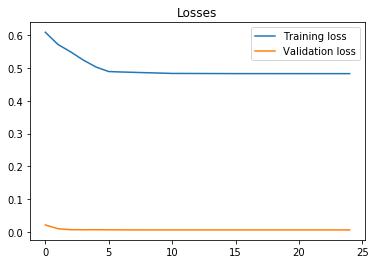

In [35]:
optimization_1.plot_losses()

Let's evaluate the model on the test set.
The future parameter is set to 5, which means that the model outputs the VWAP where it believes it will be in the next 5 time bars (5 minutes in our example).
This should make the price change visible few time bars before it occurs.

On the plot below, we can observe that predicted values closely match actual values of VWAP, which seems great on the first sight.
But the future parameter was set to 5, which means that the orange line should react before a spike occurs instead of covering it.

Test loss 0.1928


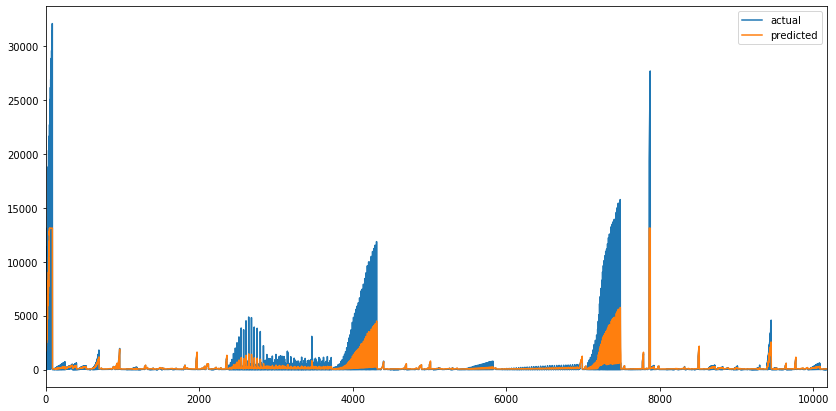

In [37]:
actual_1, predicted_1, test_loss_1 = optimization_1.evaluate(x_test, y_test, future=5, batch_size=20)
df_result_1 = to_dataframe(actual_1, predicted_1) 
df_result_1 = inverse_transform(scaler, df_result_1, ['actual', 'predicted'])
df_result_1.plot(figsize=(14, 7))
print("Test loss %.4f" % test_loss_1)

When we zoom into the spikes (one on the start and the other on the end of the time series).
We can observe that predicted values mimic the actual values.
When the actual value changes direction, predicted value follows, which doesn't help us much.
The same happens when we increase the future parameter (like it doesn't affect the predicted line).

TypeError: no numeric data to plot

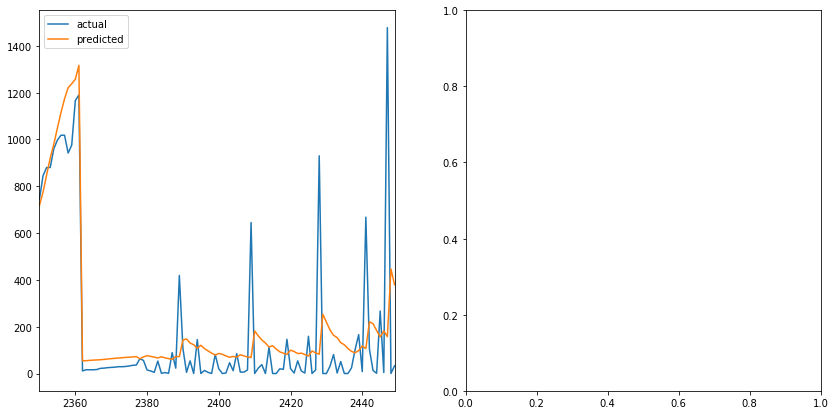

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
df_result_1.iloc[2350:2450].plot(ax=axes[0], figsize=(14, 7))
df_result_1.iloc[16000:17500].plot(ax=axes[1], figsize=(14, 7))

Let's generate 1000 time bars for the first test sequence with the model and compare predicted, generated and actual VWAP.
We can observe that while the model outputs predicted values, they are close to actual values.
But when it starts to generate values, the output almost resembles the sine wave. 
After certain period values converge to 9600.

In [38]:
x_sample = x_test[0].reshape(1, -1)
y_sample = df_test.vwap[:1100]
 
y_pred1 = generate_sequence(scaler, optimization_1.model, x_sample)

NameError: name 'df_test' is not defined

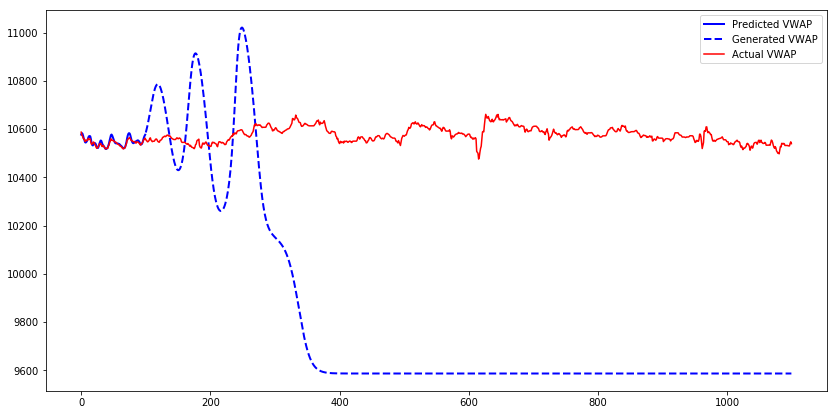

In [119]:
plt.figure(figsize=(14, 7))
plt.plot(range(100), y_pred1[0][:100], color="blue", lw=2, label="Predicted VWAP")
plt.plot(range(100, 1100), y_pred1[0][100:], "--", color="blue", lw=2, label="Generated VWAP")
plt.plot(range(0, 1100), y_sample, color="red", label="Actual VWAP")
plt.legend()

This behavior could occur because the model was trained only with true inputs and never with generated inputs.
When the model gets fed the generated output on the input, it does a poor job of generating the next values.
Teacher forcing is a concept that deals with this issue.

## Teacher Forcing

The [Teacher forcing](https://machinelearningmastery.com/teacher-forcing-for-recurrent-neural-networks/) is a method for training Recurrent Neural Networks that use the output from a previous time step as an input.
When the RNN is trained, it can generate a sequence by using the previous output as current input.
The same process can be used during training, but the model can become unstable or it does not converge.
Teacher forcing is an approach to address those issues during training. 
It is commonly used in language models. 

We are going to use an extension of Teacher forcing, called [Scheduled sampling](https://arxiv.org/abs/1506.03099).
The model will use its generated output as an input with a certain probability during training.
At first, the probability of a model seeing its generated output is small and then it gradually increases during training.
Note that in this example, we use a random probability, which doesn't increase during the training process.

Let's train a model with the same parameters as before but with the teacher forcing enabled.
After 7 epochs, the training and validation loss converge.

In [29]:
model_2 = Model(input_size=1, hidden_size=21, output_size=1)
loss_fn_2 = nn.MSELoss()
optimizer_2 = optim.Adam(model_2.parameters(), lr=1e-3)
scheduler_2 = optim.lr_scheduler.StepLR(optimizer_2, step_size=5, gamma=0.1)
optimization_2 = Optimization(model_2, loss_fn_2,  optimizer_2, scheduler_2)

In [30]:
optimization_2.train(x_train, y_train, x_val, y_val, do_teacher_forcing=True)

Epoch 1 Train loss: 0.21. Validation loss: 0.23. Avg future: 24.83. Elapsed time: 49.32s.
Epoch 2 Train loss: 0.06. Validation loss: 0.07. Avg future: 25.10. Elapsed time: 49.43s.
Epoch 3 Train loss: 0.04. Validation loss: 0.05. Avg future: 25.53. Elapsed time: 49.51s.
Epoch 4 Train loss: 0.03. Validation loss: 0.03. Avg future: 25.83. Elapsed time: 49.70s.
Epoch 5 Train loss: 0.02. Validation loss: 0.02. Avg future: 25.33. Elapsed time: 49.58s.
Epoch 6 Train loss: 0.03. Validation loss: 0.01. Avg future: 24.80. Elapsed time: 49.39s.
Epoch 7 Train loss: 0.02. Validation loss: 0.01. Avg future: 24.84. Elapsed time: 49.56s.
Epoch 8 Train loss: 0.01. Validation loss: 0.01. Avg future: 25.53. Elapsed time: 49.41s.
Epoch 9 Train loss: 0.01. Validation loss: 0.01. Avg future: 25.54. Elapsed time: 49.63s.
Epoch 10 Train loss: 0.01. Validation loss: 0.00. Avg future: 26.65. Elapsed time: 49.43s.
Epoch 11 Train loss: 0.01. Validation loss: 0.00. Avg future: 25.96. Elapsed time: 49.48s.
Epoch 12

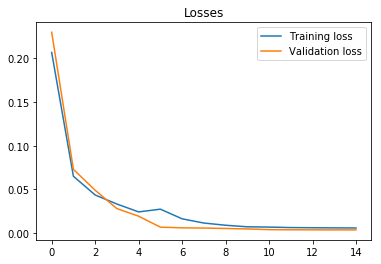

In [31]:
optimization_2.plot_losses()

We can observe a similar predicted sequence as before.
When we zoom into the spikes, similar behavior of the model can be observed, where predicted values mimic the actual values.
It seems like teacher forcing didn't solve the problem.

Test loss 0.0006


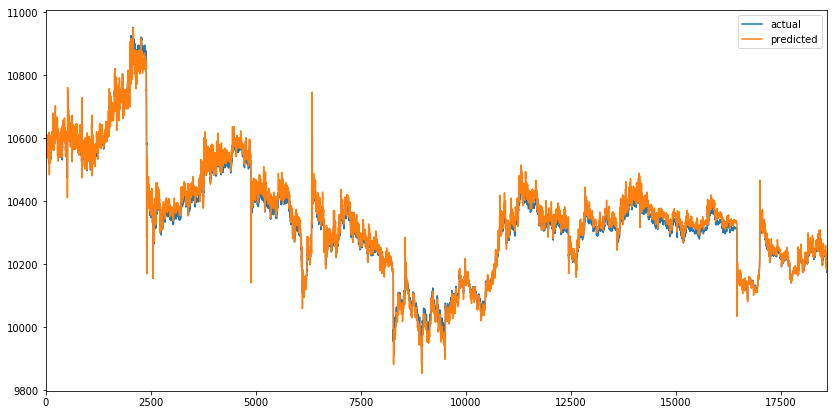

In [35]:
actual_2, predicted_2, test_loss_2 = optimization_2.evaluate(x_test, y_test, batch_size=100, future=5)
df_result_2 = to_dataframe(actual_2, predicted_2)
df_result_2 = inverse_transform(scaler, df_result_2, ["actual", "predicted"])
df_result_2.plot(figsize=(14, 7))
print("Test loss %.4f" % test_loss_2)

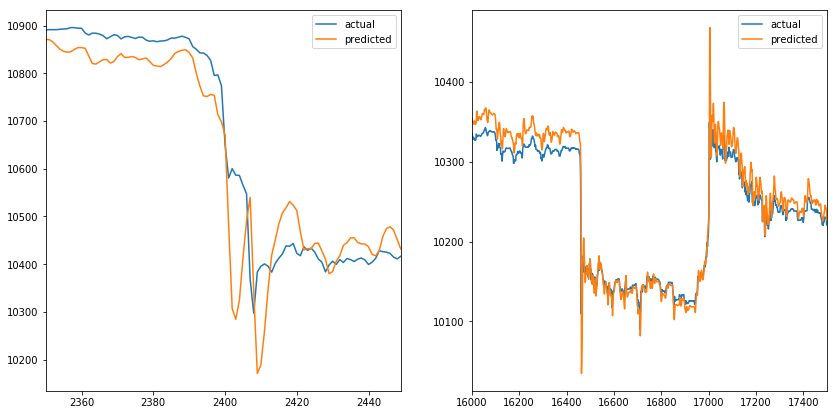

In [129]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 7))
df_result_2.iloc[2350:2450].plot(ax=axes[0], figsize=(14, 7))
df_result_2.iloc[16000:17500].plot(ax=axes[1], figsize=(14, 7))

Let's generate 1000 time bars for the first test sequence with the model trained with teacher forcing.

In [125]:
y_pred2 = generate_sequence(scaler, optimization_2.model, x_sample)

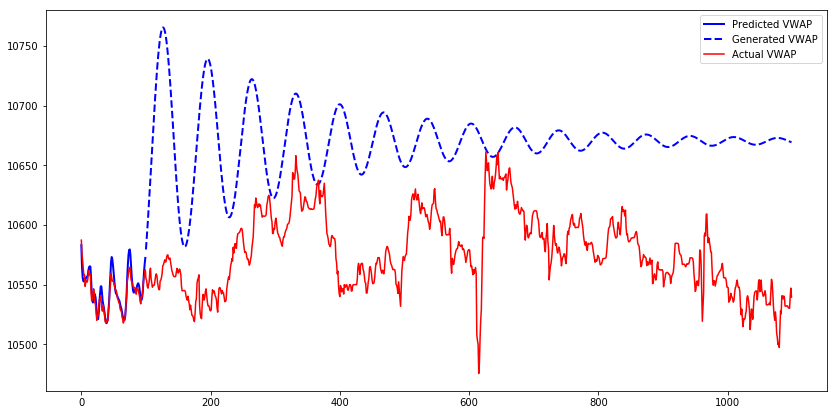

In [127]:
plt.figure(figsize=(14, 7))
plt.plot(range(100), y_pred2[0][:100], color="blue", lw=2, label="Predicted VWAP")
plt.plot(range(100, 1100), y_pred2[0][100:], "--", color="blue", lw=2, label="Generated VWAP")
plt.plot(range(0, 1100), y_sample, color="red", label="Actual VWAP")
plt.legend()

An interesting observation about the generated sequence is that the generated values from the model trained with teacher forcing need longer to converge.
Another observation about the generated sequence is that when it is increasing, it will continue to increase to some point, 
then start to decrease and the pattern repeats until the sequence converges.
The pattern looks like a sine wave with decreasing amplitude.

## Conclusion

The result of this experiment is that the predictions of the model mimic actual values of the sequence.
The first and second model do not detect price changes before they occur.
Adding another feature (like volume) might help the model to detect the price changes before they occur, but then the model would need to generate two features to use the output of those as an input in next step, which would complicate the model.
Using a more complex model (multiple LSTMCells, increase the number of hidden units) might not help as the model has the capacity to predict VWAP time series as seen in the plots above.
More advanced methods of teacher forcing might help so that the model would improve sequence generation skills.

## References
 - [Time Sequence Prediction](https://github.com/pytorch/examples/tree/master/time_sequence_prediction)
 - [Understanding LSTM Networks](https://colah.github.io/posts/2015-08-Understanding-LSTMs/)
 - [What is Teacher Forcing for Recurrent Neural Networks?](https://machinelearningmastery.com/teacher-forcing-for-recurrent-neural-networks/)
 - [Scheduled Sampling for Sequence Prediction with Recurrent Neural Networks](https://arxiv.org/abs/1506.03099)